In [6]:
from glob import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

# Endererço das imagens
img_names = glob(os.path.join(os.getcwd(),'Imagens', '*jpg'))
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
print(f'imagens a serem analisadas: {img_names}') 

Conjunto Aprovado


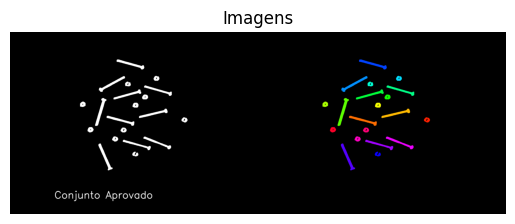

Conjunto Aprovado


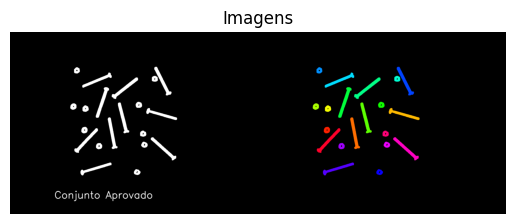

Conjunto Aprovado


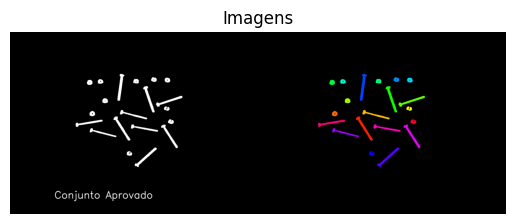

Falta 5 parafusos


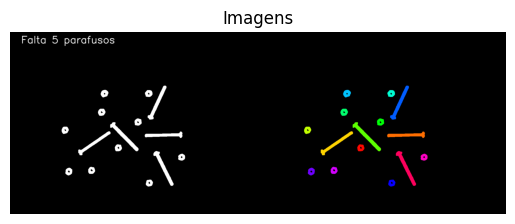

Falta 1 parafusos
Falta 1 porcas


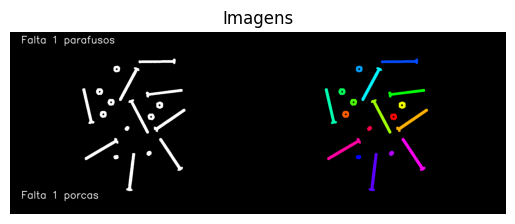

Conjunto Aprovado


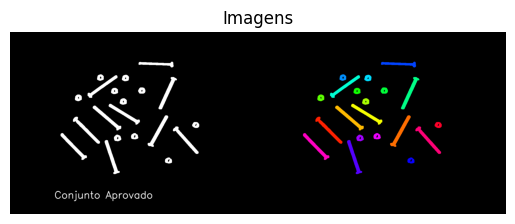

Falta 3 parafusos


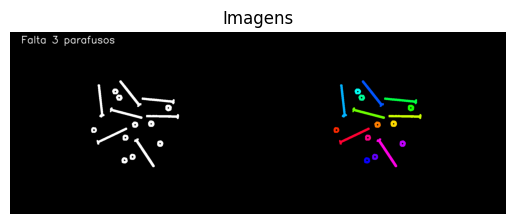

Conjunto Aprovado


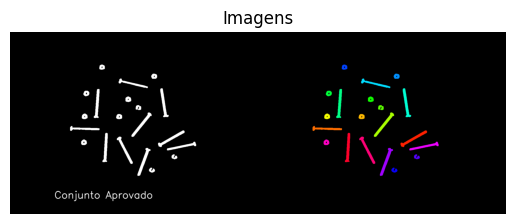

Falta 1 porcas


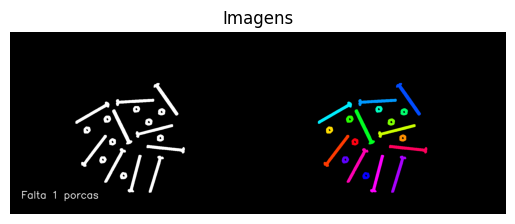

Falta 10 porcas


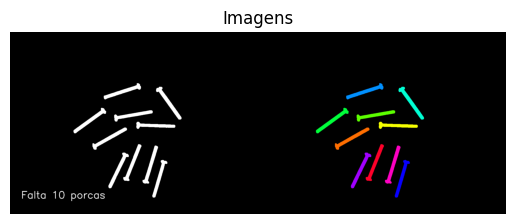

Conjunto Aprovado


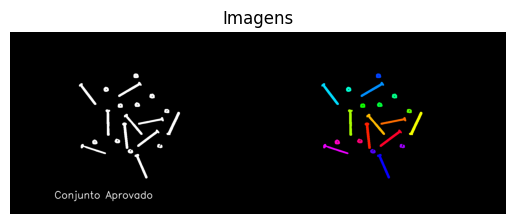

Falta 3 parafusos
Falta 3 porcas


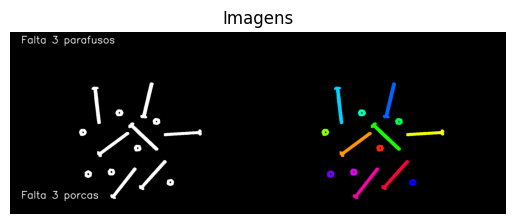

Conjunto Aprovado


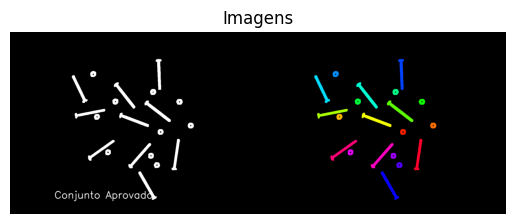

Falta 3 parafusos
Falta 1 porcas


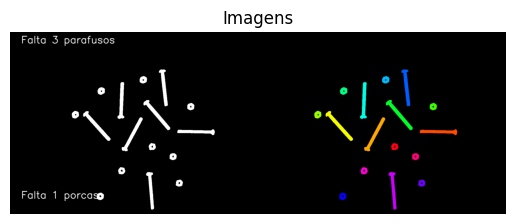

Conjunto Aprovado


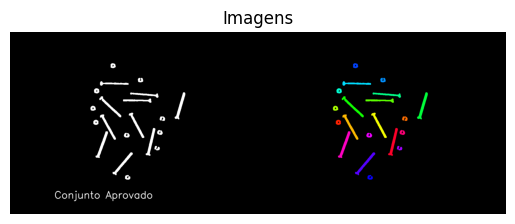

In [1]:
# Bibliotecas
from glob import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

# Endereco das imagens
img_names = glob(os.path.join(os.getcwd(), 'Imagens', '*.jpg'))
font = cv2.FONT_HERSHEY_SIMPLEX

# Ler todas as imagens na pasta e plotar
for fn in img_names:

    areas = list()

    # Imagem de entrada
    img = cv2.imread(fn, 1)

    # Separar os canais da imagens
    B, G, R = cv2.split(img)

    # Filtro bilateral - Reducao de ruidos e melhora de bordas
    img = cv2.bilateralFilter(G, 1, 90, 90)
    img = cv2.blur(img, (5, 5))

    # Converter todos os pixels entre 1-195 para 0 e os outros para 1
    img = cv2.threshold(img, 190, 255, cv2.THRESH_BINARY)[1]

    # Dilatar as imagens
    img = cv2.dilate(
        img, np.ones((4, 4), np.uint8),
        iterations=1)

    # Aplicar connectedComponents para detetctar pixels conectados
    numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        img, 4, cv2.CV_8U)

    areas.append(stats)
    df_areas = pd.DataFrame(areas[0], columns=['X', 'Y', 'W', 'H', 'AREA'])
    df_areas.drop(df_areas.index[0], inplace=True)
    parafusos = df_areas[df_areas['AREA'] > 900]
    porcas = df_areas[df_areas['AREA'] < 899]

    # Mapeie rótulos de componentes para valor de matiz, 0-179 é o intervalo de matiz no OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Convertet HSV->BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # Background preto
    labeled_img[label_hue == 0] = 0

    qntd_elem = numLabels-1

    flag = True

    if (len(parafusos) != 10):
        print(f'Falta {abs(len(parafusos) - 10)} parafusos')
        cv2.putText(
            img, f'Falta {abs(len(parafusos) - 10)} parafusos', (50, 50), font,
            1.5, (255, 255, 255), 2, cv2.LINE_AA)
        flag = False

    if (len(porcas) != 10):
        print(f'Falta {abs(len(porcas) - 10)} porcas')
        cv2.putText(
            img, f'Falta {abs(len(porcas) - 10)} porcas', (50, 750), font,
            1.5, (255, 255, 255), 2, cv2.LINE_AA)
        flag = False

    if flag is True:
        print('Conjunto Aprovado')
        cv2.putText(
            img, 'Conjunto Aprovado', (200, 750), font,
            1.5, (255, 255, 255), 2, cv2.LINE_AA)

    img_concate = cv2.hconcat(
        [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)])

    img_text = np.zeros((img_concate.shape[0], 50), dtype=np.uint8)
    imagem_total = cv2.hconcat([cv2.cvtColor(img_concate, cv2.COLOR_BGR2RGB), cv2.cvtColor(img_text, cv2.COLOR_BGR2RGB)])
    plt.imshow(imagem_total)
    plt.axis('off')
    plt.title("Imagens")
    plt.show()

